# Logistic Regression

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from sklearn.datasets import load_diabetes
daibetes=load_diabetes(as_frame=True)
daibetes


{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

In [12]:
df=daibetes.data
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [15]:
df['high_risk']=daibetes.target>=daibetes.target.mean()
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,high_risk
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,False
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,False
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,False
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,True
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,False
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,True
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,False
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,False
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,True


In [ ]:
df["high_risk"]=df["high_risk"].astype(int)
df


<bound method DataFrame.median of           age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   

           s4        s5        s6  high_r

In [22]:
x=df.drop(columns=["high_risk"])
y=df["high_risk"]

print(x.shape,y.shape)

(442, 10) (442,)


# split data intp training and test sets

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)# random_state=42 is used to get the same result every time we run the code. stratify=y is used to keep the same proportion of classes in the train and test sets.

In [25]:
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (353, 10), y_train shape: (353,)
x_test shape: (89, 10), y_test shape: (89,)


In [26]:
x_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
70,-0.001882,-0.044642,-0.069797,-0.012556,-0.000193,-0.009143,0.070730,-0.039493,-0.062917,0.040343
340,-0.016412,-0.044642,-0.013751,0.132044,-0.009825,-0.003819,0.019187,-0.039493,-0.035816,-0.030072
69,0.016281,-0.044642,-0.046085,-0.005670,-0.075870,-0.061438,-0.013948,-0.039493,-0.051404,0.019633
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775


In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test) # we use transform instead of fit_transform to avoid data leakage



In [48]:
from sklearn.preprocessing import PolynomialFeatures
poly= PolynomialFeatures(degree=2,include_bias=False)
x_train_poly=poly.fit_transform(x_train_scaled)
x_test_poly=poly.transform(x_test_scaled) # we use transform instead of fit_transform to avoid data leakage


In [42]:
print(f"x_train_poly shape: {x_train_poly.shape}, y_train shape: {y_train.shape}")  
print(f"x_test_poly shape: {x_test_poly.shape}, y_test shape: {y_test.shape}")

x_train_poly shape: (353, 66), y_train shape: (353,)
x_test_poly shape: (89, 66), y_test shape: (89,)


In [53]:
params_grid={"C":[0.01,0.1,1,10,100]}
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

clf=LogisticRegression(max_iter=1000) # max_iter=1000 is used to avoid convergence warning
grid=GridSearchCV(clf,params_grid,cv=5,scoring="accuracy") # we use cv=5 to use 5-fold cross-validation
# scoring="accuracy" is used to use accuracy as the scoring metric
grid.fit(x_train_poly,y_train) # we use fit instead of fit_transform to avoid data leakage

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100]}, scoring='accuracy')

In [54]:
print(f"Best parameters: {grid.best_params_}")

Best parameters: {'C': 0.01}


In [57]:
# make predictions on the test data 
y_pred=grid.predict(x_test_poly)
y_pred_proba=grid.predict_proba(x_test_poly)[:,1] # we use predict_proba to get the probabilities of the positive class
print(f"predictions{y_pred[:5]}") # we use [:5] to get the first 5 predictions
print(f"predictions probabilities{y_pred_proba[:5]}") # we use [:5] to get the first 5 predictions probabilities

predictions[1 1 0 0 0]
predictions probabilities[0.54644379 0.78422275 0.24551221 0.4796954  0.41844013]


# To check the accuracy , Precision , Recall, f1, roc_auc

In [64]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
accuracy=accuracy_score(y_test,y_pred) # we use accuracy_score to get the accuracy of the model
precision=precision_score(y_test,y_pred) # we use precision_score to get the precision of the model
recall=recall_score(y_test,y_pred) # we use recall_score to get the recall of the model
f1=f1_score(y_test,y_pred) # we use f1_score to get the f1 score of the model
roc_auc=roc_auc_score(y_test,y_pred_proba) # we use roc_auc_score to get the roc auc score of the model
print(f"accuracy: {accuracy:.4f}")
print(f"precision: {precision:.4f}")
print(f"recall: {recall:.4f}")
print(f"f1: {f1:.4f}")
print(f"roc_auc: {roc_auc:.4f}")


accuracy: 0.7753
precision: 0.8065
recall: 0.6410
f1: 0.7143
roc_auc: 0.8554


<Axes: >

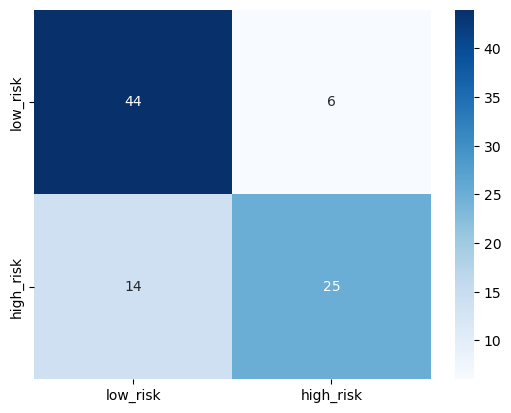

In [67]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=["low_risk","high_risk"],yticklabels=["low_risk","high_risk"])# fmt="d" is used to display the numbers as integers xticklabels and yticklabels are used to set the labels of the x and y axes , annot=True is used to display the numbers in the heatmap, cmap is used to set the color map of the heatmap
